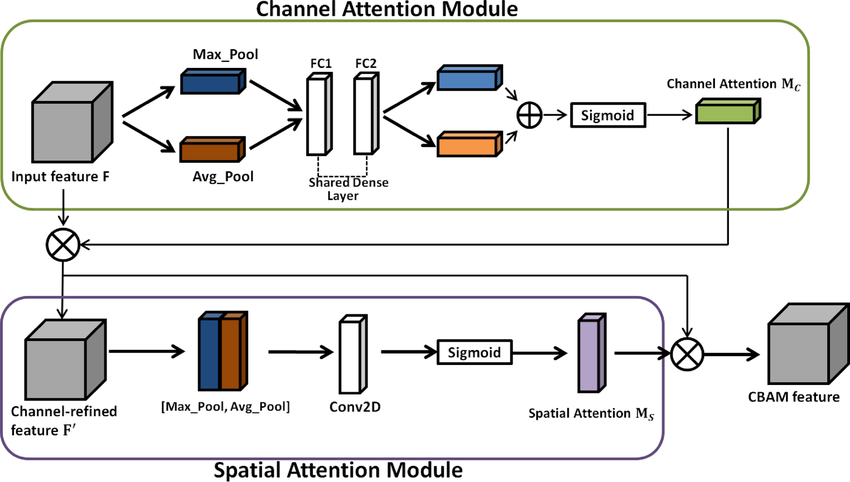


# **Complete code:**

The code shown in the first cell below is the complete code. And the detailed step by step explanation is given below with comments


In [ ]:
import torch
import torch.nn as nn

class channel_attention_module(nn.Module):
    def __init__(self, ch, ratio=8):
        super().__init__()

        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.mlp = nn.Sequential(
            nn.Linear(ch, ch//ratio, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(ch//ratio, ch, bias=False)
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x1 = self.avg_pool(x).squeeze(-1).squeeze(-1)
        x1 = self.mlp(x1)

        x2 = self.max_pool(x).squeeze(-1).squeeze(-1)
        x2 = self.mlp(x2)

        feats = x1 + x2
        feats = self.sigmoid(feats).unsqueeze(-1).unsqueeze(-1)
        refined_feats = x * feats

        return refined_feats


class spatial_attention_module(nn.Module):
    def __init__(self, kernel_size=7):
        super().__init__()

        self.conv = nn.Conv2d(2, 1, kernel_size, padding=3, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x1 = torch.mean(x, dim=1, keepdim=True)
        x2, _ = torch.max(x, dim=1, keepdim=True)

        feats = torch.cat([x1, x2], dim=1)
        feats = self.conv(feats)
        feats = self.sigmoid(feats)
        refined_feats = x * feats

        return refined_feats

class cbam(nn.Module):
    def __init__(self, channel):
        super().__init__()

        self.ca = channel_attention_module(channel)
        self.sa = spatial_attention_module()

    def forward(self, x):
        x = self.ca(x)
        x = self.sa(x)
        return x


if __name__ == "__main__":
    x = torch.randn((8, 32, 128, 128))
    module = cbam(32)
    y = module(x)
    print(y.shape)

torch.Size([8, 32, 128, 128])


# **Step-by-step explanation:**

## 1.  Channel attention:

In [ ]:
# 1st execution
import torch
import torch.nn as nn

class channel_attention_module(nn.Module):
    def __init__(self, ch, ratio=8): #ch indicates no. of channels in input feature map, ratio's default value is 8, it helps to reduce no. of feature channels in shared mlp, see fig middle portion of shared MLP
        super().__init__()

        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.mlp = nn.Sequential(  #shared MLP
            nn.Linear(ch, ch//ratio, bias=False), #linear layer, in tensorflow it is called dense layers,
                                                  #ch-input channels, ch//ratio-output channels, bias=False
            nn.ReLU(inplace=True),
            nn.Linear(ch//ratio, ch, bias=False)   #ch//ratio-this is i/p, which was o/p from previous layer, ch,original no.of channels this shows MLP's compression and expansion
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x): #execution happens here
        x1 = self.avg_pool(x)
        x2 = self.max_pool(x)

        print(x1.shape,x2.shape)

#execute them:
if __name__ == "__main__":
  x = torch.randn((8, 32, 128, 128)) #x represent feature map, give shape to tensor (batchsize, no of feature channel, h and w of feature map)
  module = channel_attention_module(32)
  module(x)

torch.Size([8, 32, 1, 1]) torch.Size([8, 32, 1, 1])


In [ ]:
#2nd execution
#So in the output we have to remove 1,1 from both sides, we just need 8,32, To do this we can apply a squeeze operation with avg pool and max pool
import torch
import torch.nn as nn

class channel_attention_module(nn.Module):
    def __init__(self, ch, ratio=8): #ch indicates no. of channels in input feature map, ratio's default value is 8, it helps to reduce no. of feature channels in shared mlp, see fig middle portion of shared MLP
        super().__init__()

        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.mlp = nn.Sequential(  #shared MLP
            nn.Linear(ch, ch//ratio, bias=False), #linear layer, in tensorflow it is called dense layers,
                                                  #ch-input channels, ch//ratio-output channels, bias=False
            nn.ReLU(inplace=True),
            nn.Linear(ch//ratio, ch, bias=False)   #ch//ratio-this is i/p, which was o/p from previous layer, ch,original no.of channels this shows MLP's compression and expansion
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x): #execution happens here
        x1 = self.avg_pool(x).squeeze(-1) #Apply squeeze operation on the last element
        x2 = self.max_pool(x).squeeze(-1) #Apply squeeze operation on the last element

        print(x1.shape,x2.shape)

#execute them:
if __name__ == "__main__":
  x = torch.randn((8, 32, 128, 128)) #x represent feature map, give shape to tensor (batchsize, no of feature channel, h and w of feature map)
  module = channel_attention_module(32)
  module(x)

torch.Size([8, 32, 1]) torch.Size([8, 32, 1])


In [ ]:
#3rd execution
#Remove the remaining 1 too using squeeze again.
import torch
import torch.nn as nn

class channel_attention_module(nn.Module):
    def __init__(self, ch, ratio=8): #ch indicates no. of channels in input feature map, ratio's default value is 8, it helps to reduce no. of feature channels in shared mlp, see fig middle portion of shared MLP
        super().__init__()

        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.mlp = nn.Sequential(  #shared MLP
            nn.Linear(ch, ch//ratio, bias=False), #linear layer, in tensorflow it is called dense layers,
                                                  #ch-input channels, ch//ratio-output channels, bias=False
            nn.ReLU(inplace=True),
            nn.Linear(ch//ratio, ch, bias=False)   #ch//ratio-this is i/p, which was o/p from previous layer, ch,original no.of channels this shows MLP's compression and expansion
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x): #execution happens here
        x1 = self.avg_pool(x).squeeze(-1).squeeze(-1) #Apply squeeze operation again to remove 2nd last element
        x2 = self.max_pool(x).squeeze(-1).squeeze(-1)

        print(x1.shape,x2.shape)

#execute them:
if __name__ == "__main__":
  x = torch.randn((8, 32, 128, 128)) #x represent feature map, give shape to tensor (batchsize, no of feature channel, h and w of feature map)
  module = channel_attention_module(32)
  module(x)


torch.Size([8, 32]) torch.Size([8, 32])


In [ ]:
#3rd execution
#Now apply MLP
import torch
import torch.nn as nn

class channel_attention_module(nn.Module):
    def __init__(self, ch, ratio=8): #ch indicates no. of channels in input feature map, ratio's default value is 8, it helps to reduce no. of feature channels in shared mlp, see fig middle portion of shared MLP
        super().__init__()

        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.mlp = nn.Sequential(  #shared MLP
            nn.Linear(ch, ch//ratio, bias=False), #linear layer, in tensorflow it is called dense layers,
                                                  #ch-input channels, ch//ratio-output channels, bias=False
            nn.ReLU(inplace=True),
            nn.Linear(ch//ratio, ch, bias=False)   #ch//ratio-this is i/p, which was o/p from previous layer, ch,original no.of channels this shows MLP's compression and expansion
        )

        self.sigmoid = nn.Sigmoid()

    def forward(self, x): #execution happens here
        x1 = self.avg_pool(x).squeeze(-1).squeeze(-1) #Apply squeeze operation to remove last and 2nd last element in tensor
        x1=self.mlp(x1) #Apply MLP for x1
        x2 = self.max_pool(x).squeeze(-1).squeeze(-1)
        x2=self.mlp(x2) #Apply MLP for x2
#Now add x1 and x2 then pass through sigmoid
        feats = x1 + x2
        feats = self.sigmoid(feats)
        #Now multiply this feats with input
        #But the input shape is (8, 32, 128, 128) and feats shape is (8,32).
        #So now we need to add that 1,1 again. so apply unsqueeze
        feats = x1 + x2
        feats = self.sigmoid(feats).unsqueeze(-1).unsqueeze(-1)
        #Now multiply both
        refined_feats = x * feats
        return refined_feats

#execute them:
if __name__ == "__main__":
  x = torch.randn((8, 32, 128, 128)) #x represent feature map, give shape to tensor (batchsize, no of feature channel, h and w of feature map)
  module = channel_attention_module(32)
  y= module(x)
  print(y.shape) #Now print the shape of refined_feats


torch.Size([8, 32, 128, 128])


## 2. Spatial attention:

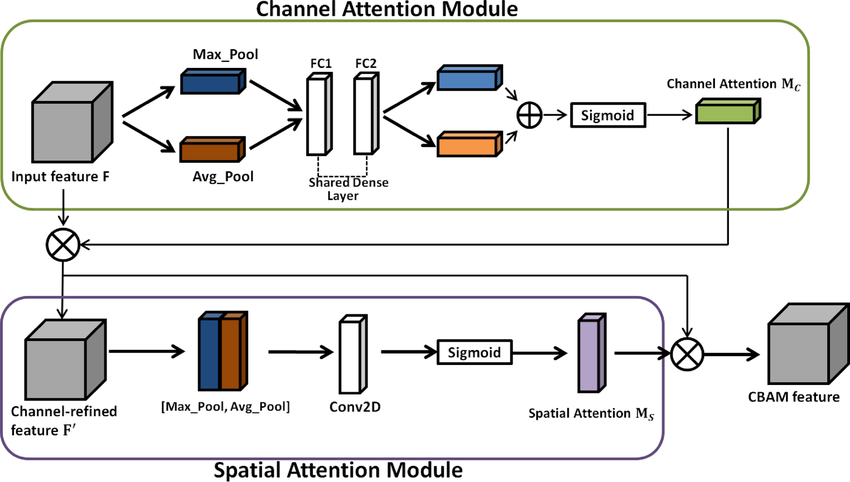

In [ ]:
#1st execution
class spatial_attention_module(nn.Module):
    def __init__(self, kernel_size=7): #init function, here kernel size default value is 7
        super().__init__()

        self.conv = nn.Conv2d(2, 1, kernel_size, padding=3, bias=False) #2 i/p features and produce 1 o/p feature, kernel size= 7
        self.sigmoid = nn.Sigmoid()

#In spatial attention also we have max pool and avg pool, but on different dimensions
    def forward(self, x):
        x1 = torch.mean(x, dim=1, keepdim=True) #keepdim-to keep dimension as it is.
        x2, _ = torch.max(x, dim=1, keepdim=True) #We are using _ here to remove the indices
        #torch.max returns a named tuple containing both the values and indices of the maximum elements.
        #And we dont want indice the shape of x1 and x2 should be same thats y to remove indices we use _
        #If we dont use _ it will through error.
        print(x1.shape)
        print(x2.shape)

        # feats = torch.cat([x1, x2], dim=1)
        # feats = self.conv(feats)
        # feats = self.sigmoid(feats)
        # refined_feats = x * feats

        # return refined_feats

#Call the function and execute it.
if __name__ == "__main__":
  x = torch.randn((8, 32, 128, 128)) #x represent feature map, give shape to tensor (batchsize, no of feature channel, h and w of feature map)
  module = spatial_attention_module(32)
  module(x)

torch.Size([8, 1, 128, 128])
torch.Size([8, 1, 128, 128])


In [ ]:
#2nd execution
# Concatenate x1 and x2
class spatial_attention_module(nn.Module):
    def __init__(self, kernel_size=7): #init function, here kernel size default value is 7
        super().__init__()

        self.conv = nn.Conv2d(2, 1, kernel_size, padding=3, bias=False) #2 i/p features and produce 1 o/p feature, kernel size= 7
        self.sigmoid = nn.Sigmoid()

#In spatial attention also we have max pool and avg pool, but on different dimensions
    def forward(self, x):
        x1 = torch.mean(x, dim=1, keepdim=True) #keepdim-to keep dimension as it is.
        x2, _ = torch.max(x, dim=1, keepdim=True) #We are using _ here to remove the indices
        #torch.max returns a named tuple containing both the values and indices of the maximum elements.
        #And we dont want indice the shape of x1 and x2 should be same thats y to remove indices we use _
        #If we dont use _ it will through error.
        feats = torch.cat([x1, x2], dim=1)
        print(feats.shape)
        # feats = self.conv(feats)
        # feats = self.sigmoid(feats)
        # refined_feats = x * feats

        # return refined_feats

#Call the function and execute it.
if __name__ == "__main__":
  x = torch.randn((8, 32, 128, 128)) #x represent feature map, give shape to tensor (batchsize, no of feature channel, h and w of feature map)
  module = spatial_attention_module(32)
  module(x)

torch.Size([8, 2, 128, 128])


In [ ]:
#3rd execution
# Now there are 2 features -> torch.Size([8, 2, 128, 128]), thats why we have 2 on conv layer
#2nd execution
# Concatenate x1 and x2
class spatial_attention_module(nn.Module):
    def __init__(self, kernel_size=7): #init function, here kernel size default value is 7
        super().__init__()

        self.conv = nn.Conv2d(2, 1, kernel_size, padding=3, bias=False) #2 i/p features and produce 1 o/p feature, kernel size= 7
        self.sigmoid = nn.Sigmoid()

#In spatial attention also we have max pool and avg pool, but on different dimensions
    def forward(self, x):
        x1 = torch.mean(x, dim=1, keepdim=True) #keepdim-to keep dimension as it is.
        x2, _ = torch.max(x, dim=1, keepdim=True) #We are using _ here to remove the indices
        #torch.max returns a named tuple containing both the values and indices of the maximum elements.
        #And we dont want indice the shape of x1 and x2 should be same thats y to remove indices we use _
        #If we dont use _ it will through error.
        feats = torch.cat([x1, x2], dim=1)
        print(feats.shape)
        # Apply conv and sigmoid
        feats = self.conv(feats)
        feats = self.sigmoid(feats)
        #Multiply this with input
        refined_feats = x * feats
        return refined_feats

#Call the function and execute it.
if __name__ == "__main__":
  x = torch.randn((8, 32, 128, 128)) #x represent feature map, give shape to tensor (batchsize, no of feature channel, h and w of feature map)
  module = spatial_attention_module()
  y = module(x)
  print(y.shape)
  # It have same shape as input shape ([8, 32, 128, 128])

torch.Size([8, 2, 128, 128])
torch.Size([8, 32, 128, 128])


CBAM function

In [ ]:
class cbam(nn.Module):
    def __init__(self, channel):
        super().__init__()

        self.ca = channel_attention_module(channel)
        self.sa = spatial_attention_module()

    def forward(self, x):
        x = self.ca(x)
        x = self.sa(x)
        return x


if __name__ == "__main__":
    x = torch.randn((8, 32, 128, 128))
    module = cbam(32)
    y = module(x)
    print(y.shape)
    # It have same shape as input shape ([8, 32, 128, 128])

torch.Size([8, 32, 128, 128])
